<a href="https://colab.research.google.com/github/helinatefera/10xWeek4/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('/content/store.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
clean_data = pd.read_csv('/content/clean_data.csv')

<ipython-input-15-e08127035647>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


In [16]:
clean_data.head()

,Date,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,DayOfWeek,is_holiday
0,2021-01-01,1,supermarket,1,0,0,0,124,0,4,1
1,2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0
2,2021-01-03,1,supermarket,1,1,0,0,74,778,6,0
3,2021-01-04,1,supermarket,0,1,0,0,0,0,0,0
4,2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0


In [60]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [53]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            10950 non-null  object
 1   Store           10950 non-null  int64 
 2   Store_Type      10950 non-null  object
 3   Store_Status    10950 non-null  int64 
 4   Promo           10950 non-null  int64 
 5   Promo2          10950 non-null  int64 
 6   School_Holiday  10950 non-null  int64 
 7   Customers       10950 non-null  int64 
 8   Sales           10950 non-null  int64 
 9   DayOfWeek       10950 non-null  int64 
 10  is_holiday      10950 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 941.1+ KB


In [5]:
len(data)

1115

In [6]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values:\n", missing_summary)

# Describe numerical features to identify outliers
print(data.describe())

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       Competition

In [7]:
# Custom function for handling outliers
def handle_outliers(X, method='cap_floor', quantile_range=(0.01, 0.99)):
    if method == 'cap_floor':
        lower_bound = X.quantile(quantile_range[0])
        upper_bound = X.quantile(quantile_range[1])
        return X.clip(lower_bound, upper_bound)
    return X


In [8]:
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(data["CompetitionDistance"].mean())
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(data["CompetitionOpenSinceMonth"].mean())
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(data["CompetitionOpenSinceYear"].mean())
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(data["Promo2SinceWeek"].mean())
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(data["Promo2SinceYear"].mean())

In [9]:
print("Missing Values:\n", missing_summary)

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


## Distribution of CompetitionDistance

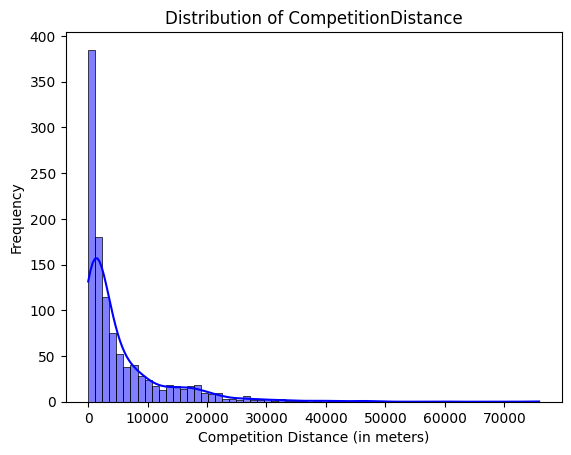

In [10]:
sns.histplot(data["CompetitionDistance"], kde=True, color='blue')
plt.title("Distribution of CompetitionDistance")
plt.xlabel("Competition Distance (in meters)")
plt.ylabel("Frequency")
plt.show()

In [11]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Distribution of Promo in Both Training and Testing Datasets

<ipython-input-13-555224272d44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)


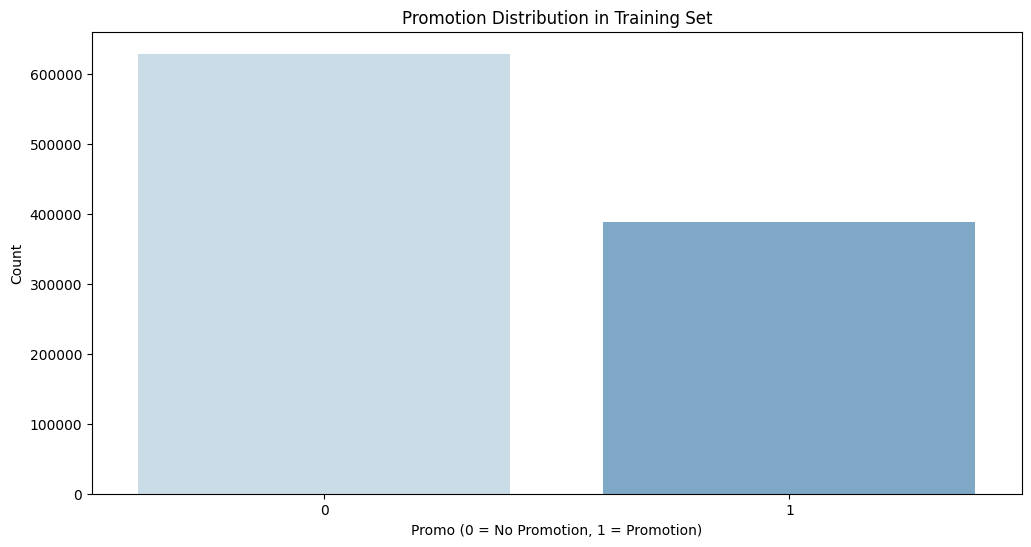

<ipython-input-13-555224272d44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)


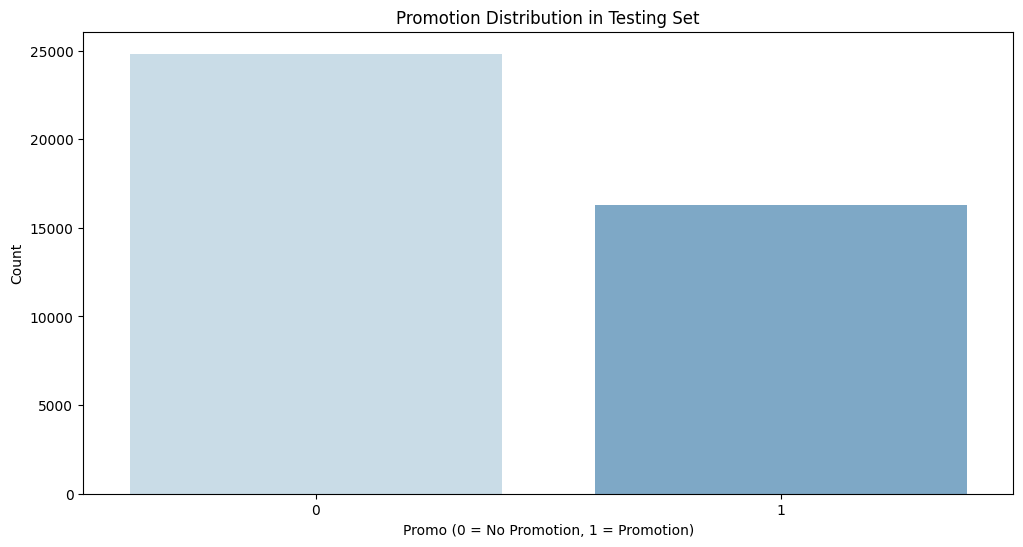

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Testing Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

The proportion of stores with promotions in both sets is **fairly consistent**, which helps ensure that your model will be exposed to similar conditions during both training and testing. However, different data sizes can still influence model performance due to the amount of data available for training versus testing.  **Larger training** set generally helps the model learn more patterns, leading to better generalization

In [17]:
promo_analysis = clean_data.groupby('Promo').agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum')
).reset_index()

In [20]:
# Calculate average sales per customer
promo_analysis['sales_per_customer'] = promo_analysis['avg_sales'] / promo_analysis['avg_customers']
promo_analysis

,Promo,avg_sales,total_sales,avg_customers,total_customers,sales_per_customer
0,0,35.395692,271131,87.656789,671451,0.403799
1,1,930.622492,3061748,87.386930,287503,10.649447


from matplotlib import pyplot as plt
promo_analysis['Promo'].plot(kind='hist', bins=20, title='Promo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['avg_sales'].plot(kind='hist', bins=20, title='avg_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['total_sales'].plot(kind='hist', bins=20, title='total_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['avg_customers'].plot(kind='hist', bins=20, title='avg_customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis.plot(kind='scatter', x='Promo', y='avg_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis.plot(kind='scatter', x='avg_sales', y='total_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis.plot(kind='scatter', x='total_sales', y='avg_customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis.plot(kind='scatter', x='avg_customers', y='total_customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Promo']
  ys = series['avg_customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = promo_analysis.sort_values('Promo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Promo')
_ = plt.ylabel('avg_customers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Promo']
  ys = series['total_customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = promo_analysis.sort_values('Promo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Promo')
_ = plt.ylabel('total_customers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Promo']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Promo'}, axis=1)
              .sort_values('Promo', ascending=True))
  xs = counted['Promo']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = promo_analysis.sort_values('Promo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Promo')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['avg_sales']
  ys = series['avg_customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = promo_analysis.sort_values('avg_sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('avg_sales')
_ = plt.ylabel('avg_customers')

from matplotlib import pyplot as plt
promo_analysis['Promo'].plot(kind='line', figsize=(8, 4), title='Promo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['avg_sales'].plot(kind='line', figsize=(8, 4), title='avg_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['total_sales'].plot(kind='line', figsize=(8, 4), title='total_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
promo_analysis['avg_customers'].plot(kind='line', figsize=(8, 4), title='avg_customers')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-21-008a699fecbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='avg_sales', palette='viridis')


Text(0, 0.5, 'Average Sales')

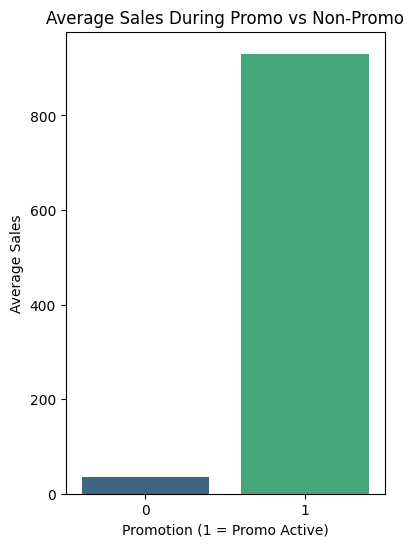

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=promo_analysis, x='Promo', y='avg_sales', palette='viridis')
plt.title('Average Sales During Promo vs Non-Promo')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Average Sales')

<ipython-input-22-331a0afe6282>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='avg_customers', palette='coolwarm')


Text(0, 0.5, 'Average Customers')

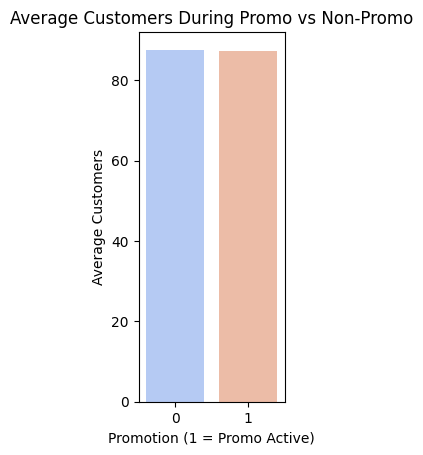

In [22]:
plt.subplot(1, 3, 2)
sns.barplot(data=promo_analysis, x='Promo', y='avg_customers', palette='coolwarm')
plt.title('Average Customers During Promo vs Non-Promo')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Average Customers')

<ipython-input-23-0be28fb6c45d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='sales_per_customer', palette='plasma')


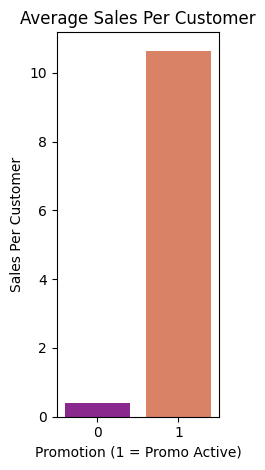

In [23]:
plt.subplot(1, 3, 3)
sns.barplot(data=promo_analysis, x='Promo', y='sales_per_customer', palette='plasma')
plt.title('Average Sales Per Customer')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Sales Per Customer')

plt.tight_layout()
plt.show()

<ipython-input-25-0eeb33a32f4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_data, x='Promo', y='Sales', palette='Set2')


Text(0, 0.5, 'Sales')

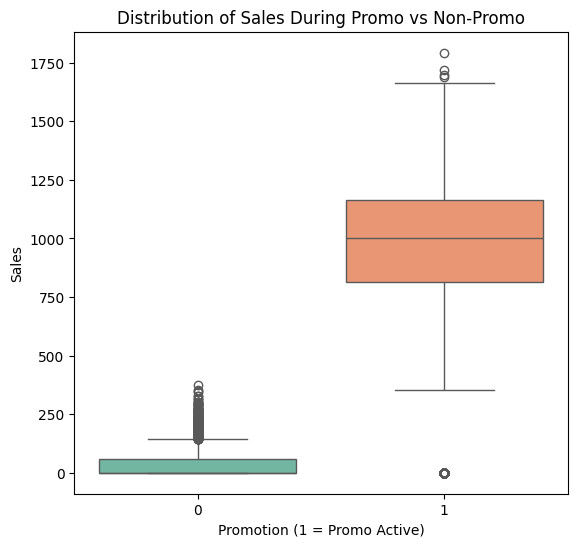

In [25]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=clean_data, x='Promo', y='Sales', palette='Set2')
plt.title('Distribution of Sales During Promo vs Non-Promo')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Sales')

### **Key Insights on Promo Impact**:

1. **Promotions Boost Spending**:
   - Sales per customer during promotions (`10.65`) are much higher than during non-promo periods (`0.40`).

2. **No Increase in Customer Footfall**:
   - The average number of customers remains nearly the same (`~87`) for both promo and no-promo periods.

3. **Sales Growth Driven by Existing Customers**:
   - Promotions lead to a substantial increase in total sales, primarily due to higher spending by the same customer base.

In [29]:
store_promo_analysis = clean_data.groupby(["Store", "Promo"]).agg(
    avg_sales=("Sales", "mean"),
    total_sales=("Sales", "sum"),
    avg_customers=("Customers", "mean"),
    sales_per_customer=("Sales", lambda x: x.sum() / clean_data.loc[x.index, "Customers"].sum())
).reset_index()

In [30]:
store_promo_analysis

,Store,Promo,avg_sales,total_sales,avg_customers,sales_per_customer
0,1,0,36.705007,27125,86.751015,0.423108
1,1,1,916.056180,326116,86.699438,10.565884
2,2,0,36.001311,27469,88.724771,0.405764
3,2,1,958.174699,318114,88.168675,10.867518
4,3,0,34.734478,26294,87.651255,0.396280
5,3,1,947.837278,320369,89.171598,10.629363
6,4,0,37.673077,27426,88.625000,0.425084
7,4,1,922.588556,338590,86.384196,10.680062
8,5,0,33.432756,25108,88.968043,0.375784
9,5,1,931.444767,320417,86.357558,10.785909


In [33]:
underperforming_stores = store_promo_analysis[
    (store_promo_analysis["Promo"] == 1) &
    (store_promo_analysis["sales_per_customer"] < 10.5)
]

In [34]:
underperforming_stores

,Store,Promo,avg_sales,total_sales,avg_customers,sales_per_customer
13,7,1,905.705128,282580,86.560897,10.463213


**Promotions Are Equally Effective:**

- Promotions yield similar sales per customer across most stores, indicating uniform promotional impact.

In [46]:
# Filter stores with 5 working days in the week
weekday_stores = clean_data[clean_data['DayOfWeek'] <= 5]
weekday_open_stores = weekday_stores.groupby('Store')['DayOfWeek'].count()
consistent_weekday_stores = weekday_open_stores[weekday_open_stores == 5].index

# Filter weekend data for these stores
weekend_data = clean_data[(clean_data['DayOfWeek'] > 5)]

In [49]:
weekend_sales = weekend_data.groupby(['Store']).agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum'),
    dayOfweek = ('DayOfWeek', 'unique'),
    sales_per_customer=('Sales', lambda x: x.sum() / weekend_data['Customers'].sum())
).reset_index()

In [50]:
weekend_sales

,Store,avg_sales,total_sales,avg_customers,total_customers,dayOfweek,sales_per_customer
0,1,370.713376,58202,87.936306,13806,[6],0.421491
1,2,267.343949,41973,87.573248,13749,[6],0.303963
2,3,345.541401,54250,88.949045,13965,[6],0.392871
3,4,383.891720,60271,89.566879,14062,[6],0.436474
4,5,312.668790,49089,88.375796,13875,[6],0.355496
5,6,274.121019,43037,86.700637,13612,[6],0.311668
6,7,361.764331,56797,83.783439,13154,[6],0.411316
7,8,267.847134,42052,85.503185,13424,[6],0.304535
8,9,340.541401,53465,91.044586,14294,[6],0.387186
9,10,295.382166,46375,90.095541,14145,[6],0.335841


In [45]:
clean_data

,Date,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,DayOfWeek,is_holiday
0,2021-01-01,1,supermarket,1,0,0,0,124,0,4,1
1,2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0
2,2021-01-03,1,supermarket,1,1,0,0,74,778,6,0
3,2021-01-04,1,supermarket,0,1,0,0,0,0,0,0
4,2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10945,2023-12-27,10,pharmacy,1,0,1,0,112,28,2,0
10946,2023-12-28,10,convenience,1,0,0,0,111,55,3,0
10947,2023-12-29,10,convenience,1,0,0,0,99,0,4,0
10948,2023-12-30,10,supermarket,1,0,0,0,106,106,5,0


The data indicates that on **weekends** (specifically the 6th day of the week), sales and customer patterns vary slightly across stores. While the average number of customers remains relatively consistent across all stores , the average sales per store differ significantly.

In [55]:
merged_data = pd.merge(clean_data, data, on='Store', how='left')

In [65]:
merged_data.head()

,Date,Store,Store_Type,Store_Status,Promo,Promo2_x,School_Holiday,Customers,Sales,DayOfWeek,is_holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2_y,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2021-01-01,1,supermarket,1,0,0,0,124,0,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,2021-01-03,1,supermarket,1,1,0,0,74,778,6,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2021-01-04,1,supermarket,0,1,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [58]:
assortment_analysis = merged_data.groupby('Assortment').agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum'),
    competition_distance=('CompetitionDistance', 'mean')
).reset_index()

In [64]:
merged_data

,Date,Store,Store_Type,Store_Status,Promo,Promo2_x,School_Holiday,Customers,Sales,DayOfWeek,is_holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2_y,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2021-01-01,1,supermarket,1,0,0,0,124,0,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,2021-01-03,1,supermarket,1,1,0,0,74,778,6,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2021-01-04,1,supermarket,0,1,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,2023-12-27,10,pharmacy,1,0,1,0,112,28,2,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
10946,2023-12-28,10,convenience,1,0,0,0,111,55,3,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
10947,2023-12-29,10,convenience,1,0,0,0,99,0,4,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
10948,2023-12-30,10,supermarket,1,0,0,0,106,106,5,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [59]:
assortment_analysis

,Assortment,avg_sales,total_sales,avg_customers,total_customers,competition_distance
0,a,304.805479,2336334,87.690150,672145,8124.285714
1,c,303.362253,996545,87.308676,286809,8883.333333


1. **Assortment Type "a" (Basic)**:
   - **Average Sales**: 304.81
   - **Total Sales**: 2,336,334
   - **Average Customers**: 87.69
   - **Total Customers**: 672,145
   - **Competition Distance**: 8,124 meters

2. **Assortment Type "c" (Extended)**:
   - **Average Sales**: 303.36
   - **Total Sales**: 996,545
   - **Average Customers**: 87.31
   - **Total Customers**: 286,809
   - **Competition Distance**: 8,883 meters

### Key Insights:

- **Sales Behavior**:
  - Assortment type **"a" (Basic)** has a **higher total sales** compared to **"c" (Extended)**, even though their average sales are similar. This suggests that **basic assortments** may appeal to a larger customer base, contributing to the higher total sales.
  
- **Customer Engagement**:
  - The **average number of customers** for both types is very close, but **Assortment "a"** is able to generate significantly higher **total sales**, indicating that it might serve a broader audience or have better sales per customer.

- **Competition Impact**:
  - The **competition distance** is slightly greater for **Assortment "c"**, which could mean that extended assortments may face more competition, potentially affecting their total sales. Conversely, **Assortment "a" (Basic)** is performing better in a slightly less competitive environment.

In [72]:
correlation = merged_data[['CompetitionDistance', 'Sales']].corr()
print("Correlation between Competition Distance and Total Sales:")
correlation

Correlation between Competition Distance and Total Sales:


,CompetitionDistance,Sales
CompetitionDistance,1.000000,-0.003522
Sales,-0.003522,1.000000


The **correlation** analysis reveals that the relationship between competition distance and sales is minimal, with a correlation coefficient of -0.003522, indicating almost no linear relationship. This suggests that the proximity of competitors does not significantly influence sales.